In [ ]:
print("test")

test


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/50_Startups.csv")

In [ ]:
# @title Basic Inspection


In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.shape

(50, 5)

In [ ]:
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
# @title Null Values

In [ ]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
df.isnull().mean() * 100  # % of nulls per column


,0
R&D Spend,0.0
Administration,0.0
Marketing Spend,0.0
State,0.0
Profit,0.0


In [ ]:
df[df.isnull().any(axis=1)]   # Rows with at least one null

,R&D Spend,Administration,Marketing Spend,State,Profit


In [ ]:
# @title Unique & Duplicate Values

In [ ]:
df.nunique()

,0
R&D Spend,49
Administration,50
Marketing Spend,48
State,3
Profit,50


In [ ]:
df.duplicated().sum()# Total duplicate rows


np.int64(0)

In [ ]:
df[df.duplicated()]# Display duplicate rows

,R&D Spend,Administration,Marketing Spend,State,Profit


In [ ]:
# @title Visualisation

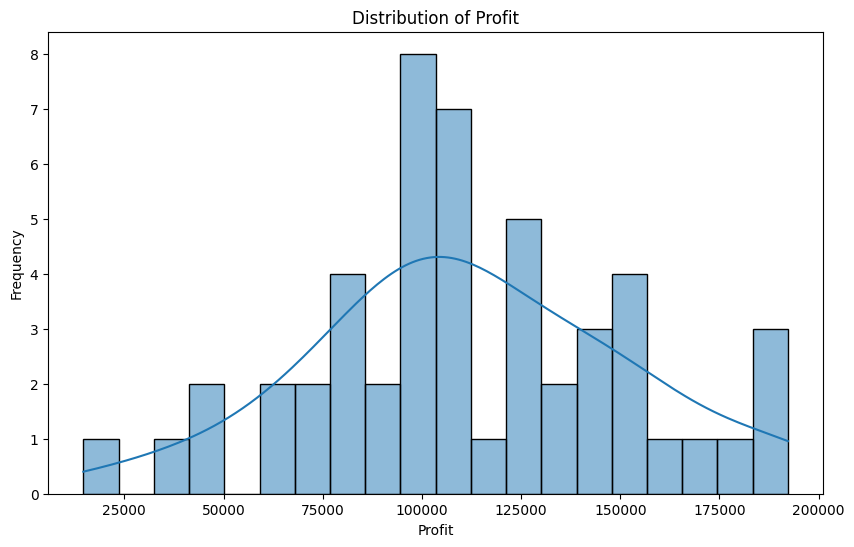

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=20, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

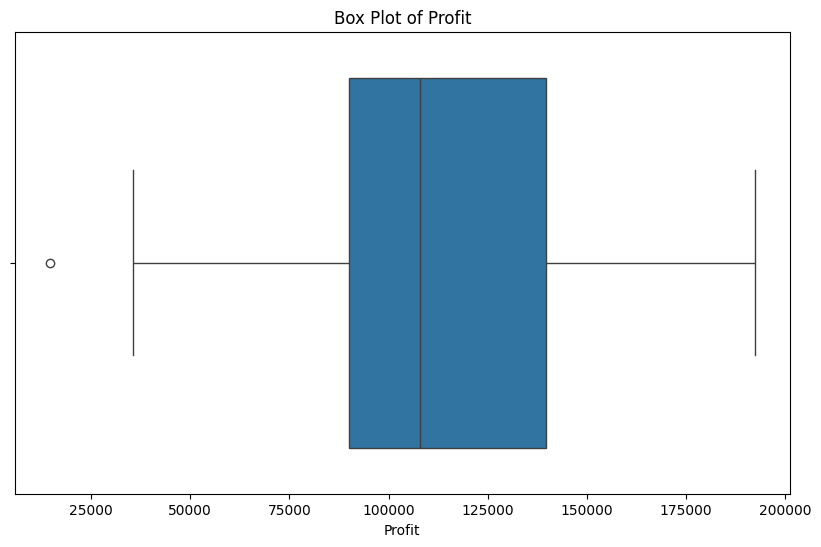

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profit', data=df)
plt.title('Box Plot of Profit')
plt.xlabel('Profit')
plt.show()

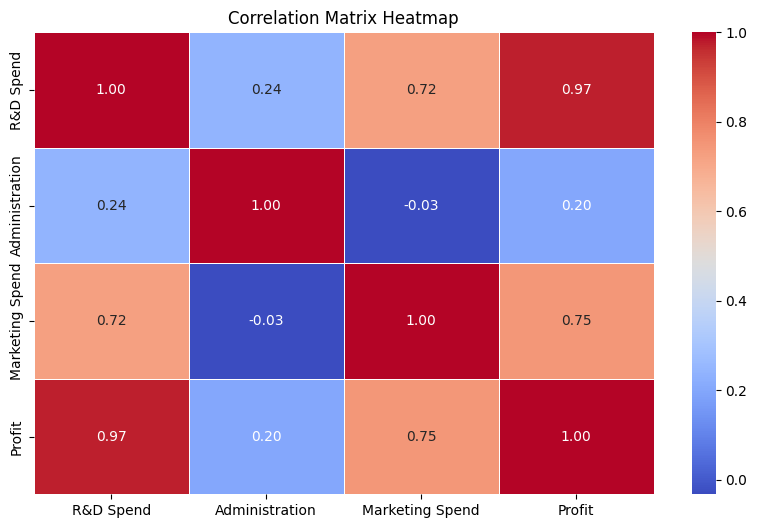

In [ ]:
# Compute correlation
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


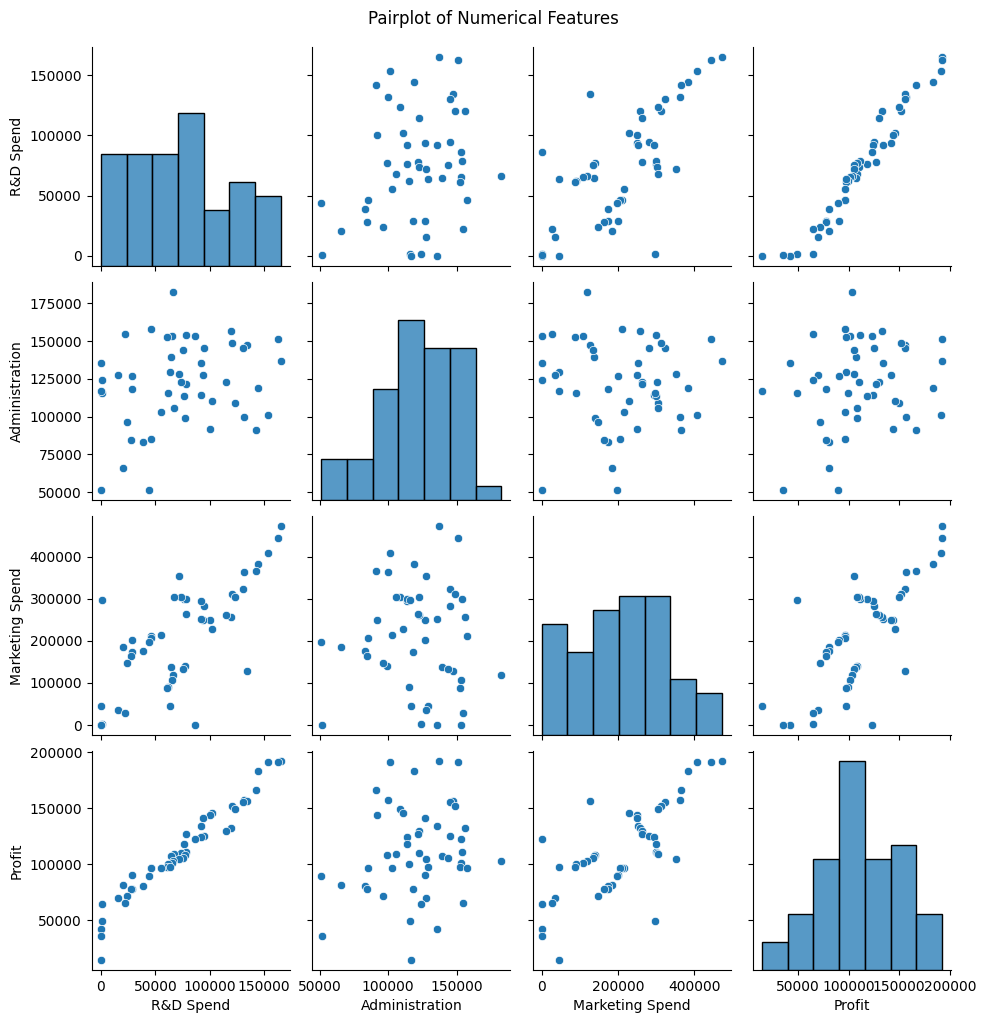

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


In [ ]:
# @title  Outliers Detection

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

def detect_outliers_zscore(df, threshold=2.0):
    """
    Detects outlier rows in a DataFrame using the Z-score method.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        threshold (float): Z-score threshold for considering a value an outlier.

    Returns:
        pd.DataFrame: Rows from the original DataFrame that contain outliers.
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=np.number)

    # Compute absolute Z-scores
    z_scores = np.abs(zscore(numeric_df, nan_policy='omit'))

    # Create a boolean mask for rows with any outlier
    outlier_mask = (z_scores > threshold).any(axis=1)

    # Return original rows with outliers
    return df[outlier_mask]


In [ ]:
# Detect outliers using Z-score
outlier_rows = detect_outliers_zscore(df)

# Display results
print(f"Total outlier rows: {len(outlier_rows)}")
display(outlier_rows)


Total outlier rows: 5


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
28,66051.52,182645.56,118148.20,Florida,103282.38
37,44069.95,51283.14,197029.42,California,89949.14
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


In [ ]:
outliers_profit = detect_outliers_iqr(df, 'Profit')
print(f"Outliers in Profit: {len(outliers_profit)}")
display(outliers_profit)


Outliers in Profit: 1


,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

def detect_outliers_zscore(df, threshold=2.0):
    numeric_df = df.select_dtypes(include=np.number)
    z_scores = np.abs(zscore(numeric_df, nan_policy='omit'))
    mask = (z_scores > threshold).any(axis=1)
    return df[mask]

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Example usage
z_outliers = detect_outliers_zscore(df)
iqr_outliers_profit = detect_outliers_iqr(df, 'Profit')

print(f"🔹 Z-Score Outliers: {len(z_outliers)} rows")
print(f"🔹 IQR Outliers in 'Profit': {len(iqr_outliers_profit)} rows")


🔹 Z-Score Outliers: 5 rows
🔹 IQR Outliers in 'Profit': 1 rows


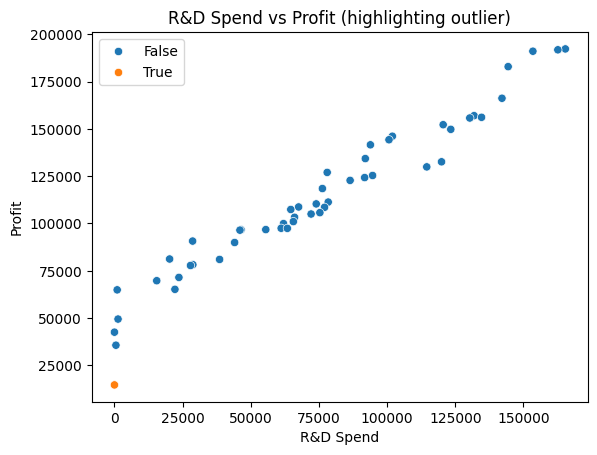

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="R&D Spend", y="Profit", hue=df.index==49)
plt.title("R&D Spend vs Profit (highlighting outlier)")
plt.show()


In [ ]:
# @title Feature Engineering

In [ ]:
#1. label encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'State' column
df['State_encoded'] = label_encoder.fit_transform(df['State'])

In [ ]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'California': np.int64(0), 'Florida': np.int64(1), 'New York': np.int64(2)}


In [ ]:
if 'State' in df.columns:
    print("'State' column exists in the DataFrame.")
else:
    print("'State' column does not exist in the DataFrame.")

df.head()

'State' column exists in the DataFrame.


,R&D Spend,Administration,Marketing Spend,State,Profit,State_encoded
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'State_encoded'],
      dtype='object')

In [ ]:
#@title LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

# X = features, y = target
X = df.drop(['Profit', 'State'] , axis=1 )  # scaled features
y = df['Profit']  # assuming 'Profit' is your target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 83866027.64389345
R-squared (R2) Score: 0.9403937677548101


In [ ]:
# @title XGBRegressor

In [ ]:
from xgboost import XGBRegressor
X = df.drop(['Profit', 'State'] , axis=1 )  # scaled features
y = df['Profit']  # assuming 'Profit' is your target column
a_train, a_test, b_train, b_test = train_test_split(X, y, test_size=0.3, random_state=42)
model2 = XGBRegressor()
model2.fit(a_train, b_train)
ypred = model2.predict(a_test)


In [ ]:
# Calculate evaluation metrics
b_mse = mean_squared_error(b_test, ypred)
b_r2 = r2_score(b_test, ypred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 175476261.98627272
R-squared (R2) Score: 0.8752834834399938


/tmp/ipython-input-62-3317070580.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x="Model", y="R2 Score", palette="viridis")
/tmp/ipython-input-62-3317070580.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x="Model", y="MSE", palette="magma")


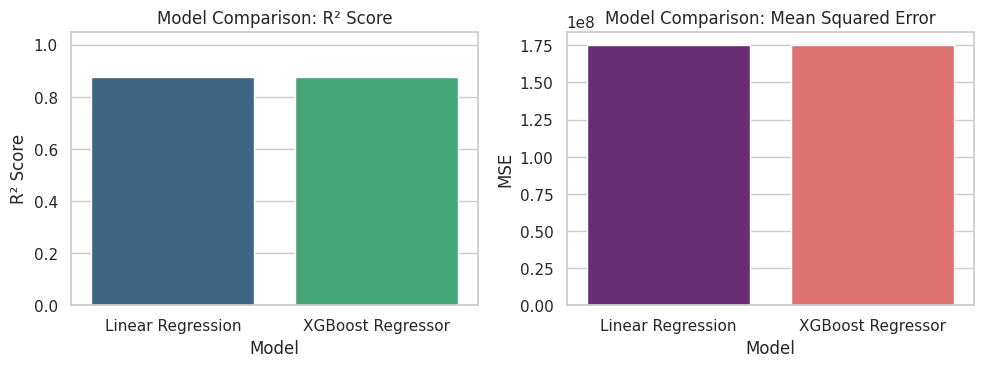

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Collect results
results = {
    "Model": ["Linear Regression", "XGBoost Regressor"],
    "MSE": [mse, b_mse],  # You might need to rename if different variable names
    "R2 Score": [r2, b_r2]
}

# Create a DataFrame
df_results = pd.DataFrame(results)

# Set style
sns.set(style="whitegrid")

# Plot R2 Scores
plt.figure(figsize=(10, 4))

# R2 Score Plot
plt.subplot(1, 2, 1)
sns.barplot(data=df_results, x="Model", y="R2 Score", palette="viridis")
plt.title("Model Comparison: R² Score")
plt.ylim(0, 1.05)
plt.ylabel("R² Score")

# MSE Plot
plt.subplot(1, 2, 2)
sns.barplot(data=df_results, x="Model", y="MSE", palette="magma")
plt.title("Model Comparison: Mean Squared Error")
plt.ylabel("MSE")

plt.tight_layout()
plt.show()


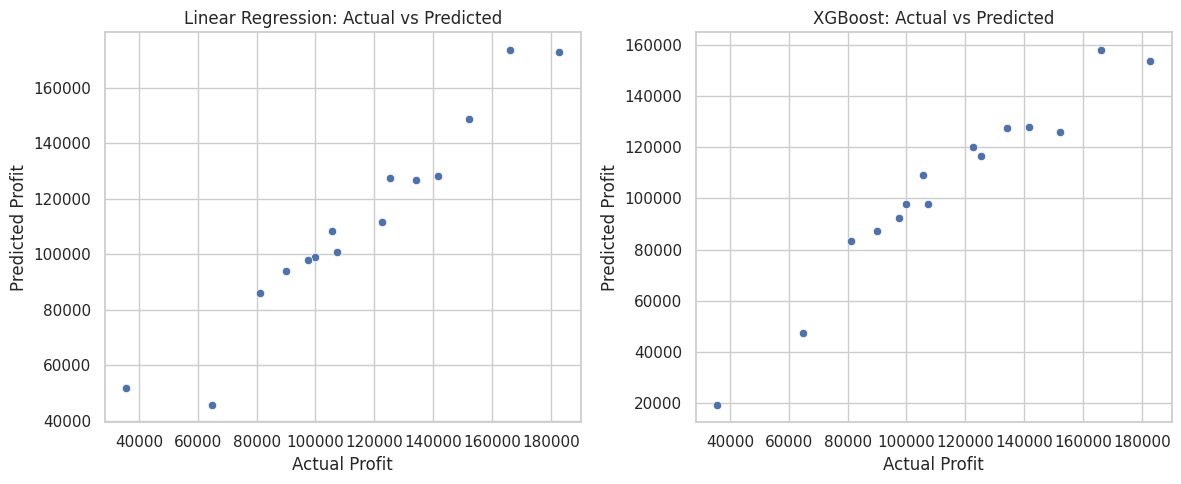

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")

plt.subplot(1, 2, 2)
sns.scatterplot(x=b_test, y=ypred)
plt.title("XGBoost: Actual vs Predicted")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")

plt.tight_layout()
plt.show()


/tmp/ipython-input-64-1067883101.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


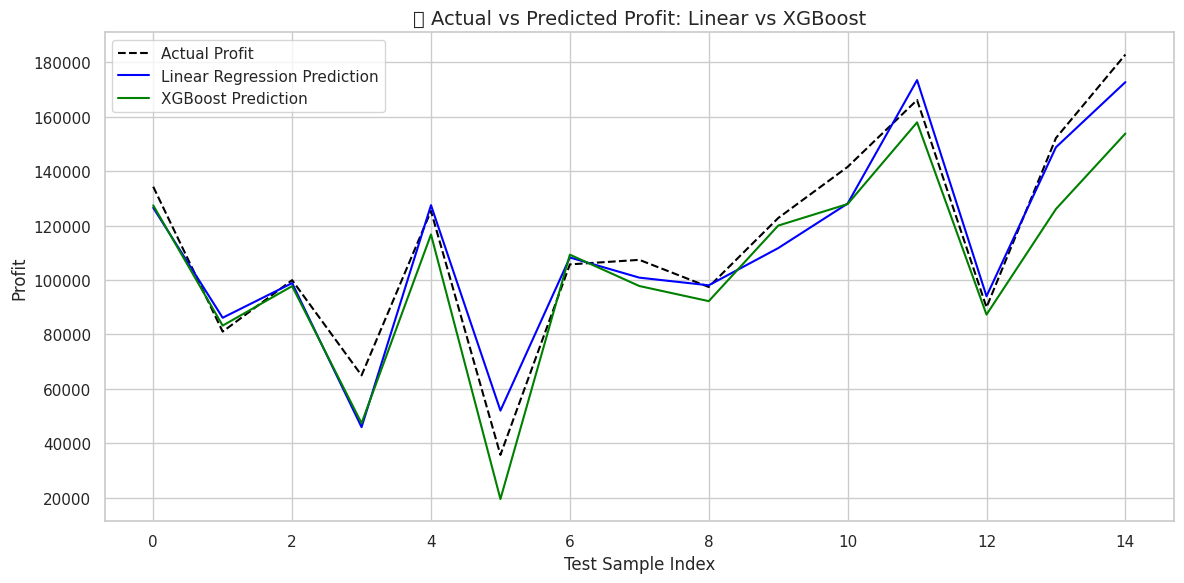

In [ ]:
import matplotlib.pyplot as plt

# Sort index to align values (important for line plots)
y_test_sorted = y_test.reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred).reset_index(drop=True)
b_test_sorted = b_test.reset_index(drop=True)
ypred_sorted = pd.Series(ypred).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Profit", color='black', linestyle='--')
plt.plot(y_pred_sorted, label="Linear Regression Prediction", color='blue')
plt.plot(ypred_sorted, label="XGBoost Prediction", color='green')

plt.title("📈 Actual vs Predicted Profit: Linear vs XGBoost", fontsize=14)
plt.xlabel("Test Sample Index")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
import joblib
joblib.dump(model, "model.pkl")



['model.pkl']